Baseline-NN Model
-----------------------------

In [1]:
# Getting the dataset from the .npz file
import numpy as np

np.random.seed(42)

# Loading the date
data = np.load("preprocessed_data.npz")
x_train_flat, y_train = data["x_train_flat"], data["y_train"]
x_val_flat, y_val = data["x_val_flat"], data["y_val"]
x_test_flat, y_test = data["x_test_flat"], data["y_test"]

Dropout is a regularization technique, in which Dropout randomly set a fraction of the neuron's output to 0 in a layer in each forward pass.

In [2]:
# Training NN model with compared dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

def build_model_with_dropout():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


L2 Regularization is Ridge Regression, and it scales the weights towards 0

In [4]:
# With L2 Regularization

def build_model_with_l2():
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [5]:
# Training the models and comparing them
dropout_model = build_model_with_dropout()
l2_model = build_model_with_l2()

# Train both models
dropout_history = dropout_model.fit(x_train_flat, y_train, validation_data=(x_val_flat, y_val), epochs=10, batch_size=64, verbose=2)
l2_history = l2_model.fit(x_train_flat, y_train, validation_data=(x_val_flat, y_val), epochs=10, batch_size=64, verbose=2)

Epoch 1/10
766/766 - 3s - 4ms/step - accuracy: 0.7123 - loss: 0.8180 - val_accuracy: 0.8250 - val_loss: 0.5002
Epoch 2/10
766/766 - 2s - 2ms/step - accuracy: 0.8002 - loss: 0.5590 - val_accuracy: 0.8480 - val_loss: 0.4374
Epoch 3/10
766/766 - 2s - 2ms/step - accuracy: 0.8187 - loss: 0.5094 - val_accuracy: 0.8522 - val_loss: 0.4110
Epoch 4/10
766/766 - 2s - 2ms/step - accuracy: 0.8261 - loss: 0.4844 - val_accuracy: 0.8483 - val_loss: 0.4167
Epoch 5/10
766/766 - 2s - 2ms/step - accuracy: 0.8312 - loss: 0.4678 - val_accuracy: 0.8550 - val_loss: 0.4015
Epoch 6/10
766/766 - 2s - 2ms/step - accuracy: 0.8354 - loss: 0.4527 - val_accuracy: 0.8596 - val_loss: 0.3838
Epoch 7/10
766/766 - 2s - 3ms/step - accuracy: 0.8397 - loss: 0.4420 - val_accuracy: 0.8633 - val_loss: 0.3911
Epoch 8/10
766/766 - 2s - 3ms/step - accuracy: 0.8466 - loss: 0.4330 - val_accuracy: 0.8640 - val_loss: 0.3770
Epoch 9/10
766/766 - 3s - 4ms/step - accuracy: 0.8470 - loss: 0.4203 - val_accuracy: 0.8628 - val_loss: 0.3813
E

In [6]:
# Evaluate both models
dropout_train_acc = dropout_history.history['accuracy'][-1]
dropout_val_acc = dropout_history.history['val_accuracy'][-1]
dropout_gap = dropout_train_acc - dropout_val_acc

l2_train_acc = l2_history.history['accuracy'][-1]
l2_val_acc = l2_history.history['val_accuracy'][-1]
l2_gap = l2_train_acc - l2_val_acc

print("\nDropout Model:")
print(f"Train Accuracy: {dropout_train_acc:.4f}")
print(f"Val Accuracy:   {dropout_val_acc:.4f}")
print(f"Overfitting Gap: {dropout_gap:.4f}")

print("\nL2 Regularized Model:")
print(f"Train Accuracy: {l2_train_acc:.4f}")
print(f"Val Accuracy:   {l2_val_acc:.4f}")
print(f"Overfitting Gap: {l2_gap:.4f}")



Dropout Model:
Train Accuracy: 0.8491
Val Accuracy:   0.8691
Overfitting Gap: -0.0200

L2 Regularized Model:
Train Accuracy: 0.8756
Val Accuracy:   0.8543
Overfitting Gap: 0.0213


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


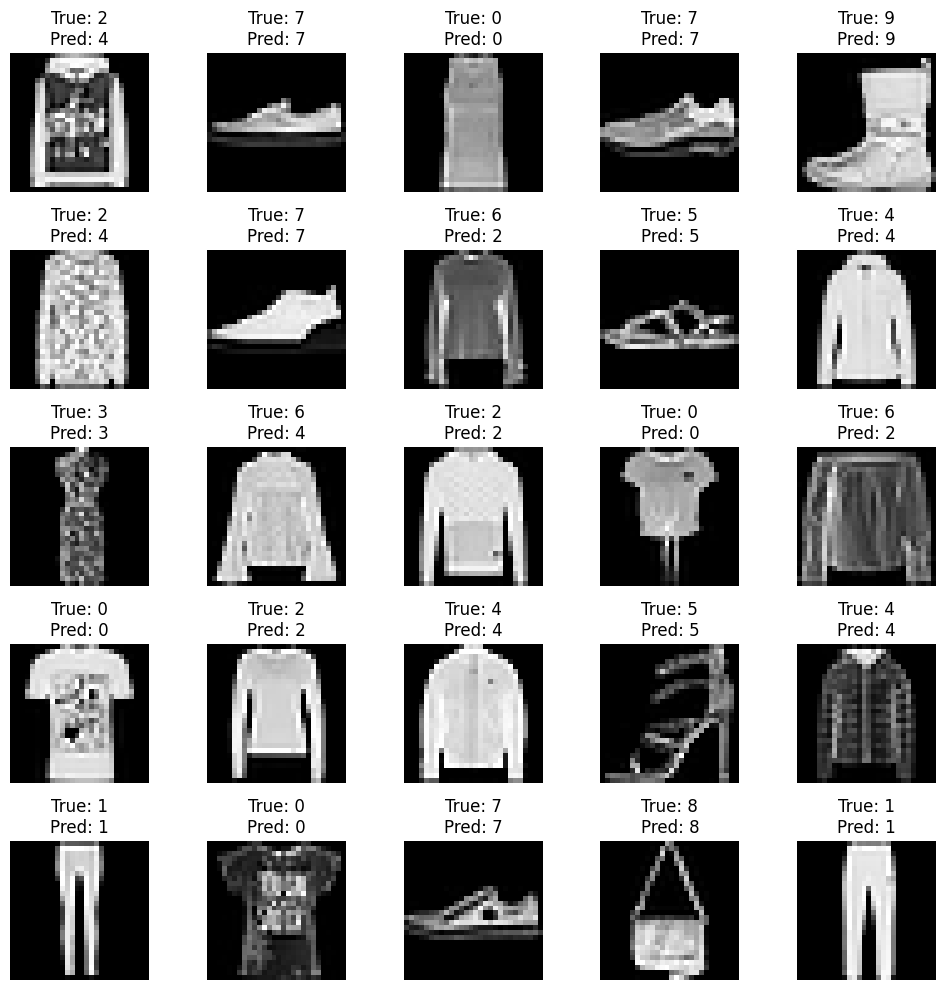

In [7]:
# Use L2 model for testing
predictions = l2_model.predict(x_test_flat[:25])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
